**Importing Libraries and Datasets of Fitness Trackers**

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

df=pd.read_csv('C:/Users/SOUBHIK MANDAL/Desktop/jupyter notebook/Fitness Trackers Market Analysis/Fitness_trackers.csv',thousands=',')
df

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,1799,2199,OLED Display,4.3,Plastic,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...
560,Huawei,Smartwatch,Watch 36456,Black,55000,55000,AMOLED Display,4.1,Silicone,14,NaN
561,Huawei,Smartwatch,GT Fortuna-B19S Sport,Black,13990,20990,AMOLED Display,4.1,Elastomer,14,NaN
562,GOQii,FitnessBand,HR,Black,1999,1999,OLED Display,3.8,Silicone,7,NaN
563,GOQii,FitnessBand,Vital,Black,3499,3499,OLED Display,3.7,Thermoplastic polyurethane,7,NaN


In [2]:
df.dtypes

Brand Name                         object
Device Type                        object
Model Name                         object
Color                              object
Selling Price                       int64
Original Price                      int64
Display                            object
Rating (Out of 5)                 float64
Strap Material                     object
Average Battery Life (in days)      int64
Reviews                           float64
dtype: object

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Selling Price,565.0,22110.373451,19914.926066,1195.0,8990.000,15995.0,29900.00,122090.0
Original Price,565.0,25365.361062,20384.028759,1599.0,12999.000,19995.0,32900.00,122090.0
Rating (Out of 5),514.0,4.229961,0.390827,2.0,4.025,4.3,4.50,5.0
Average Battery Life (in days),565.0,9.026549,7.868670,1.0,2.000,7.0,14.00,45.0
Reviews,78.0,2492.948718,5607.529743,2.0,107.750,346.0,1580.75,23426.0


<AxesSubplot:>

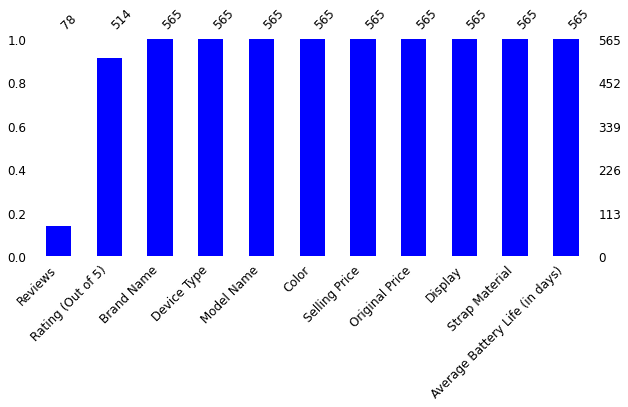

In [4]:
color=['#0000FF']
msno.bar(df,figsize=(10,4), color=color,fontsize=12,sort="ascending")

**Types of Devices in the Fitness Tracking Industry**

In [5]:
df['Brand Name'].groupby(df['Device Type']).count().sort_values(ascending=False)

Device Type
Smartwatch     490
FitnessBand     75
Name: Brand Name, dtype: int64

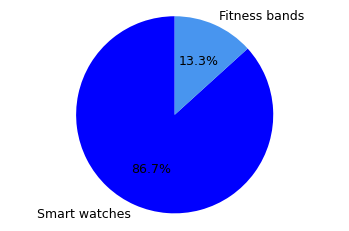

In [6]:
labels = 'Smart watches', 'Fitness bands'
sizes = [490,75]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=["#0000FF",'#4895ef'],autopct='%1.1f%%', startangle=90,textprops={'color':'black','fontsize':12.5})
ax1.axis('equal')
plt.show()

**Types of Brands of Fitness Trackers**

In [7]:
df['Brand Name'].nunique()

20

In [8]:
df['Brand Name'].groupby(df['Brand Name']).count().sort_values(ascending=False).iloc[:5]

Brand Name
FOSSIL      133
GARMIN      101
APPLE        86
FitBit       51
SAMSUNG      48
Name: Brand Name, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Brand Name'>

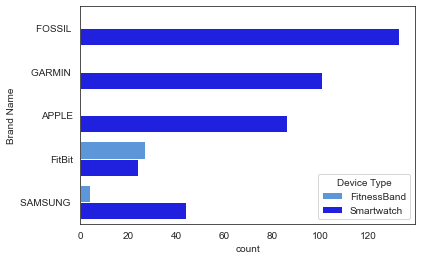

In [9]:
sns.set_style('white')
sns.countplot(y="Brand Name", hue="Device Type", data=df, palette=["#4895ef","#0000FF"],
order=df["Brand Name"].value_counts().iloc[:5].index)

**Rating (Out of 5) of Fitness Trackers Brands**

In [10]:
round(df.groupby('Brand Name')['Rating (Out of 5)'].mean().sort_values(ascending=False).iloc[:10],1)

Brand Name
APPLE       4.5
OnePlus     4.3
FOSSIL      4.2
SAMSUNG     4.2
Honor       4.2
FitBit      4.2
Xiaomi      4.2
Huawei      4.2
huami       4.2
realme      4.1
Name: Rating (Out of 5), dtype: float64

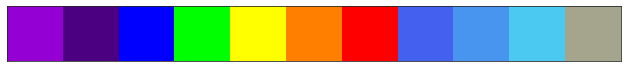

In [11]:
colors = ["#9400D3","#4B0082","#0000FF","#00FF00","#FFFF00","#FF7F00",\
"#FF0000","#4361EE","#4895EF","#4CC9F0","#a5a58d"]
palette = sns.color_palette(palette = colors)

sns.palplot(palette, size =1)
plt.show()

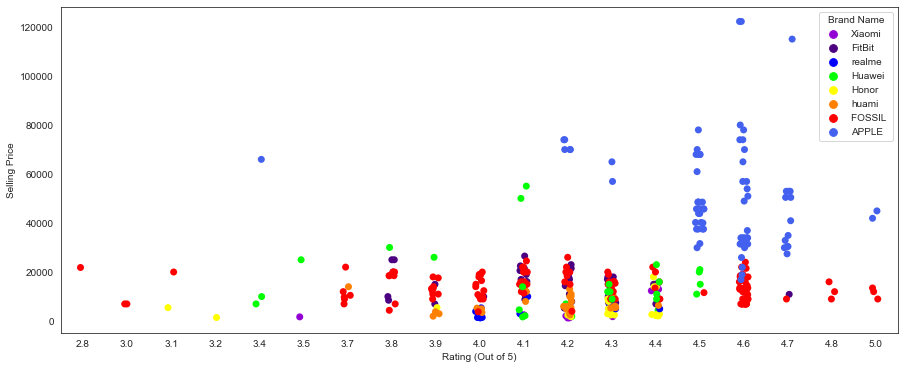

In [12]:
list = ["APPLE","OnePlus","FOSSIL ","SAMSUNG","Honor","FitBit","Xiaomi","Huawei","huami","realme"]
series = df["Brand Name"].isin(list)
df_f = df[series]
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.stripplot(x="Rating (Out of 5)", y="Selling Price", data=df_f,hue="Brand Name", palette=colors,size=7, marker="o")

**Average Battery Life (in days) of Fitness Trackers**

In [13]:
round(df.groupby('Brand Name')['Average Battery Life (in days)'].mean(),0).sort_values(ascending=False)

Brand Name
GARMIN      17.0
huami       16.0
Oppo        14.0
Honor       12.0
Xiaomi      12.0
SAMSUNG     12.0
Huawei      11.0
realme      10.0
OnePlus      9.0
boAt         8.0
FitBit       7.0
GOQii        7.0
LAVA         7.0
Noise        7.0
LCARE        6.0
Fastrack     6.0
Noise        5.0
FOSSIL       5.0
Infinix      4.0
APPLE        1.0
Name: Average Battery Life (in days), dtype: float64

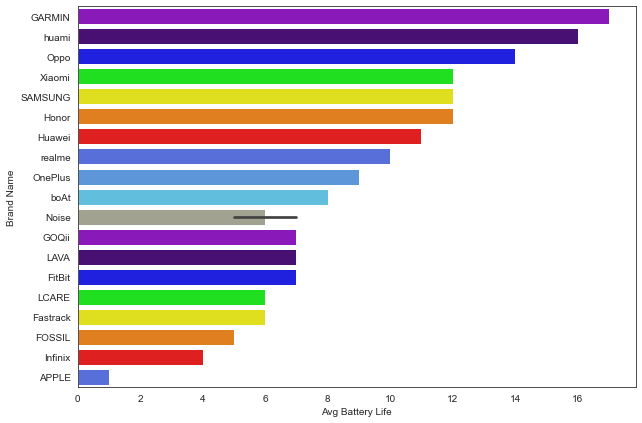

In [14]:
data={"Brand Name":["GARMIN","huami","Oppo","Xiaomi","SAMSUNG","Honor","Huawei","realme","OnePlus","boAt","Noise","GOQii","LAVA","FitBit","LCARE","Fastrack","FOSSIL","Noise","Infinix","APPLE"],"Avg Battery Life":[17.0,16.0,14.0,12.0,12.0,12.0,11.0,10.0,9.0,8.0,7.0,7.0,7.0,7.0,6.0,6.0,5.0,5.0,4.0,1.0]}
df_batt=pd.DataFrame(data)
sns.set_style('white')
plt.figure(figsize=(10,7))
ax=sns.barplot(x="Avg Battery Life", y="Brand Name",data=df_batt, palette= colors)

**Types of Strap Material and Colours of Fitness Trackers**

<AxesSubplot:xlabel='count', ylabel='Strap Material'>

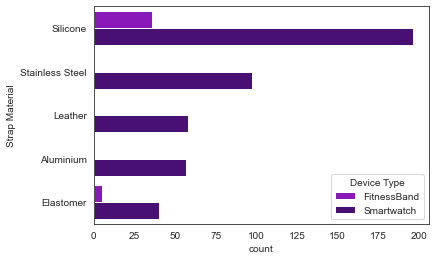

In [15]:
sns.countplot(y="Strap Material", hue="Device Type", data=df, palette=colors,order=df["Strap Material"].value_counts().iloc[:5].index)

<AxesSubplot:xlabel='count', ylabel='Color'>

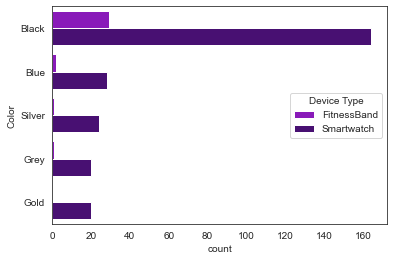

In [16]:
sns.countplot(y="Color", hue="Device Type", data=df, palette=colors,order=df["Color"].value_counts().iloc[:5].index)

**Selling Price and Maximum Retail Price of Fitness Trackers**

In [17]:
df.groupby('Brand Name')['Selling Price'].mean().sort_values(ascending=False).apply(np.ceil)

Brand Name
APPLE       49414.0
GARMIN      35039.0
SAMSUNG     22902.0
Oppo        16490.0
Huawei      15875.0
FitBit      14019.0
FOSSIL      13825.0
huami        7548.0
OnePlus      6933.0
Honor        5510.0
realme       4403.0
boAt         4247.0
Xiaomi       4101.0
Noise        3330.0
GOQii        3124.0
LCARE        2347.0
LAVA         1999.0
Noise        1949.0
Fastrack     1755.0
Infinix      1499.0
Name: Selling Price, dtype: float64

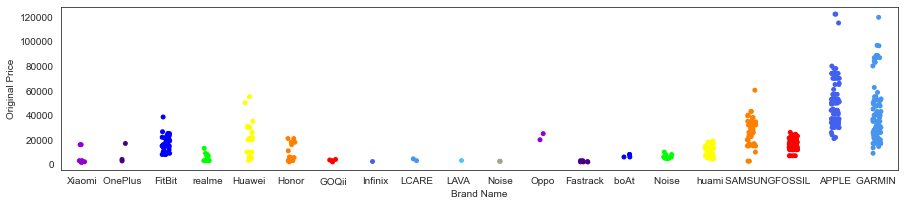

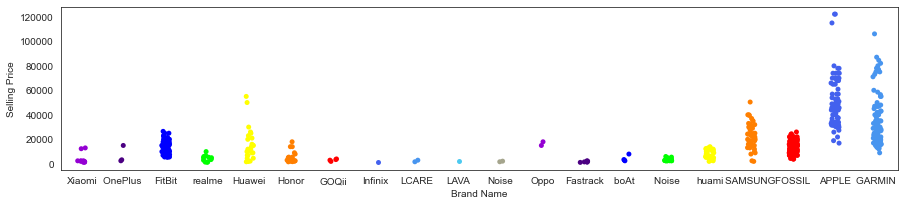

In [18]:
fig, ax = plt.subplots(figsize=(15,3))
ax = sns.stripplot(y="Original Price", x="Brand Name", data=df,palette=colors)
fig, ax = plt.subplots(figsize=(15,3))
ax = sns.stripplot(y="Selling Price", x="Brand Name", data=df,palette=colors)